In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
import math
from scipy.stats.mstats import gmean
from scipy.stats import gamma, poisson, linregress, beta, norm
from scipy import optimize
from scipy import interpolate
import time
import random
import pickle as pkl
import inspect
from cratrcountr import *
%matplotlib inline

To calculcate the true error probability density function (PDF) of the cratering parameter λ from an observed N, use true_error_pdf function.  Here's an example for observations of N=3 and N=7:

In [2]:
N_3_pdf = true_error_pdf(3)
N_7_pdf = true_error_pdf(7)

The output of the function is a RandomVariable object.  The RandomVariable object has a number of functionalities.  It has fields for the central value (.val) and upper (.high) and lower (.low) bounds.  It also has fields for upper (.upper) and lower (.lower) bound error bars.  There are many different methods for choosing a central value and error bars.  Here are those fields for both the N=3 and N=7 examples for the 'log' (default) and 'median' methods:

In [3]:
print('N=3:')
print('Maximum likelihood value (log): ' + str(N_3_pdf.val))
print('Median (median): ' + str(N_3_pdf.as_kind('median').val))
print('Lower bound (log): ' + str(N_3_pdf.low))
print('Upper bound (log): ' + str(N_3_pdf.high))
print('Lower error bar (log): ' + str(N_3_pdf.lower))
print('Upper error bar (log): ' + str(N_3_pdf.upper))
print('Lower error bar (median): ' + str(N_3_pdf.as_kind('median').lower))
print('Upper error bar (median): ' + str(N_3_pdf.as_kind('median').upper))
print('\nN=7:')
print('Maximum likelihood value (log): ' + str(N_7_pdf.val))
print('Median (median): ' + str(N_7_pdf.as_kind('median').val))
print('Lower bound (log): ' + str(N_7_pdf.low))
print('Upper bound (log): ' + str(N_7_pdf.high))
print('Lower error bar (log): ' + str(N_7_pdf.lower))
print('Upper error bar (log): ' + str(N_7_pdf.upper))
print('Lower error bar (median): ' + str(N_7_pdf.as_kind('median').lower))
print('Upper error bar (median): ' + str(N_7_pdf.as_kind('median').upper))

N=3:
Maximum likelihood value (log): 3
Median (median): 3.6720609427545265
Lower bound (log): 1.5280616585766515
Upper bound (log): 4.970397435445902
Lower error bar (log): 1.4719383414233485
Upper error bar (log): 1.9703974354459017
Lower error bar (median): 1.5864015947632573
Upper error bar (median): 2.246127462981917

N=7:
Maximum likelihood value (log): 7
Median (median): 7.669249620601936
Lower bound (log): 4.610807032856862
Upper bound (log): 9.887743884756091
Lower error bar (log): 2.3891929671431376
Upper error bar (log): 2.887743884756091
Lower error bar (median): 2.437637858993523
Upper error bar (median): 3.1010344626507544


RandomVariable objects have a .plot() method.  Let's use the .plot() method to plot the PDFs for both N=3 (on top in blue) and N=7 (on the bottom in orange).  Note how we use the upshift parameter to move the N=3 plot up.  For each of these plots, the solid line indicates the maximum likelihood value, the dashed line indicates the median, and the dotted lines indicate the upper and lower bounds (1σ equivalent).  These plots work with Matplotlib, so we can modify them using standard Matplotlib functionalities, such as plt.xlim() as shown here.

(0.0, 20.0)

<Figure size 640x480 with 0 Axes>

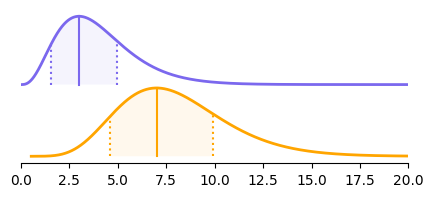

In [4]:
N_3_pdf.plot(upshift=1.05)
N_7_pdf.plot(color='orange')
plt.xlim([0, 20])

We can also automatically label a RandomVariable plot.  Here's an example for the N=3 distribution.

<Figure size 640x480 with 0 Axes>

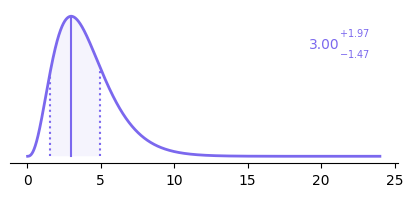

In [5]:
N_3_pdf.plot(label=True)

We can choose between the different schemes for central values and error bars with the error_bar_type parameter, as well as by casting the RandomVariable to a different "kind" of scheme with the .as_kind() method.  The 'log' kind fits an asymmetric normal distribution around the maximum likelihood value to the log space version of the PDF.  The 'auto log' kind is similar but finds the closest fit for the maximum likelihood value that divides the two halves of the asymmetric normal distribution, rather than simply choosing the maximum likelihood value, as the 'log' kind does.  The 'linear' kind fits an asymmetric normal distribution in linear space.  The 'median' kind centers around the median value with percentile equivalents of a standard deviation for errors.  The 'mean' kind centers around the mean (a.k.a. the "expectation value") with symmetric error bars equal to the standard deviation.  (RandomVariable objects with kind='mean' have a .std field as well as a .skewness field that quantifies the asymmetry via a skewness parameter).  The 'sqrt(N)' kind is a normal distribution with a standard deviation of sqrt(N).

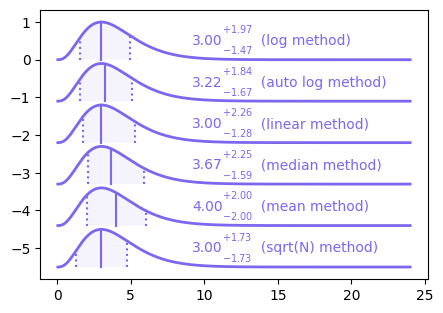

In [6]:
fig = plt.figure(figsize=(5, 3.5))
ax = fig.add_subplot(111)
upshift = 0
kind_list = ['log', 'auto log', 'linear', 'median', 'mean', 'sqrt(N)']
for kind in kind_list:
    N_3_pdf.plot(
        label=True, error_bar_type=kind, upshift=upshift,
        unit='  (' + kind + ' method)',
        label_shift_x=-10, label_shift_y=-0.3
    )
    upshift -= 1.1

When we have a preexisting axis object ax, the .plot() method does not create its own default ax, which means that if we want the spines erased, we have to run the erase_box(ax) function.

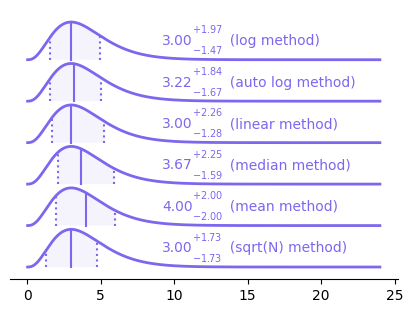

In [7]:
fig = plt.figure(figsize=(5, 3.5))
ax = fig.add_subplot(111)
erase_box(ax)
upshift = 0
kind_list = ['log', 'auto log', 'linear', 'median', 'mean', 'sqrt(N)']
for kind in kind_list:
    N_3_pdf.plot(
        label=True, error_bar_type=kind, upshift=upshift,
        unit='  (' + kind + ' method)',
        label_shift_x=-10, label_shift_y=-0.3
    )
    upshift -= 1.1

The labeling location and the spacing between the value and the error bars are both optimized for the plot size in the .plot() method.  When we modify the X-axis range after the fact, as we do here, it creates anomalies.

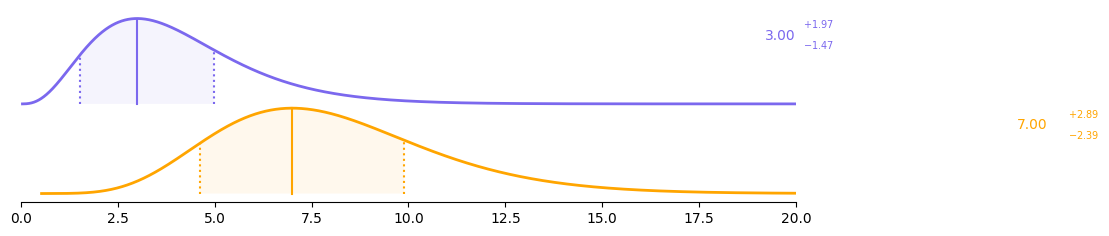

In [8]:
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(111)
N_3_pdf.plot(upshift=1.05, label=True)
N_7_pdf.plot(color='orange', label=True)
plt.xlim([0, 20])
erase_box(ax)

Fortunately, we can adjust the spacing anomalies with the fig_size_adjustor parameter and move the labels around with the label_shift_x and label_shift_y parameters.

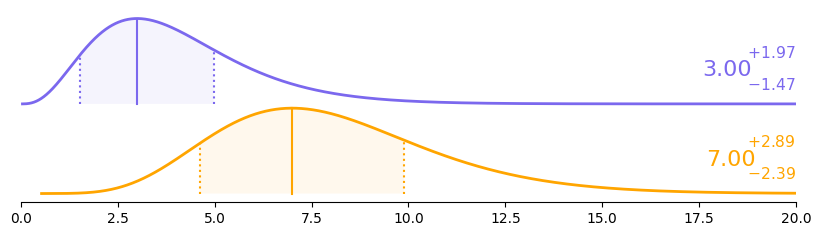

In [9]:
fig = plt.figure(figsize=(10, 2.5))
ax = fig.add_subplot(111)
N_3_pdf.plot(
    upshift=1.05, label=True, fig_size_adjustor=3.75, 
    label_shift_x=-1.6, label_shift_y=-0.4, label_text_size=16
)
N_7_pdf.plot(
    color='orange', label=True, fig_size_adjustor=2.55, 
    label_shift_x=-8.0, label_shift_y=-0.4, label_text_size=16
)
plt.xlim([0, 20])
erase_box(ax)

Another way to do this is to set the xlim parameters within the .plot() method and then modify where it shows up with the right_position_modifier parameter.

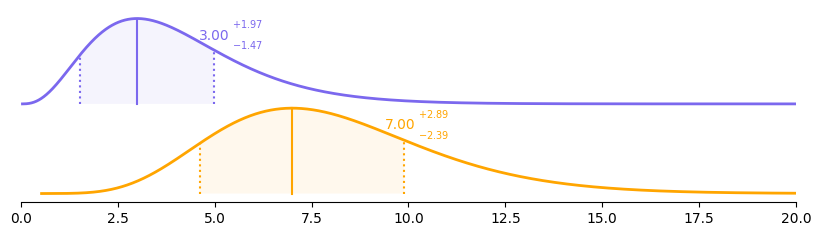

In [10]:
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(111)
erase_box(ax)
N_3_pdf.plot(upshift=1.05, label='max', xlim=[0, 20], right_position_modifier=0.23)
N_7_pdf.plot(color='orange', label='max', xlim=[0, 20], right_position_modifier=0.47)

Mathematically, the RandomVariable object describes the PDF with paired X and P arrays.  The X array represents the value of a variable such as cratering rate parameter λ, crater density, crater SFD slope, etc.  The P array represents the probabilty that corresponds with every value of the variable in the X array.  The plots are effectively a plot of P against X.  The X and P arrays are stored as .X and .P fields of the Random Variable object.

In [11]:
N_3_pdf.X, N_3_pdf.P

(array([ 0.03967313,  0.04206803,  0.04446292, ..., 23.98144268,
        23.98383758, 23.98623247]),
 array([2.39549372e-08, 2.84919340e-08, 3.35598043e-08, ...,
        2.11715707e-10, 2.11272560e-10, 2.10830334e-10]))

RandomVariable objects support simple addition, subtraction, division, and multiplication with simple numbers.  You can even use the +, -, *, and / operators.  Here, we show the N=3 distribution with 3 added (red) and multiplied by 2 (green).  Note how these are not identical.  The multiplication broadens the distribution, even though the maximum value remains the same.

(0.0, 20.0)

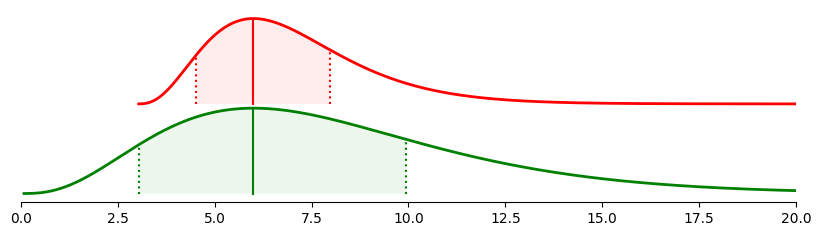

In [12]:
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(111)
erase_box(ax)
adding_3 = N_3_pdf + 3
adding_3.plot(color='red', upshift=1.05)
multiplying_by_2 = N_3_pdf * 2
multiplying_by_2.plot(color='green')
plt.xlim([0, 20])

Mathematically, these operations are performed on the .X array field of the RandomVariable object.  For instance, for a multiplication by two, the RandomVariable object will multiply the .X array by 2.

In [13]:
N_3_pdf.X, (N_3_pdf * 2).X

(array([ 0.03967313,  0.04206803,  0.04446292, ..., 23.98144268,
        23.98383758, 23.98623247]),
 array([ 0.07934626,  0.08413606,  0.08892585, ..., 47.96288536,
        47.96767515, 47.97246494]))

Another way to multiply by a number would be to multiply the .X field by that number and create a new RandomVariable object with the mulitplied .X field.  Here, we can see that this produces RandomVariable objects with the exact same maximum likelihood value as doing the multiplication directly.

In [14]:
RandomVariable(N_3_pdf.X * 2, N_3_pdf.P).val,  (N_3_pdf * 2).val

(np.float64(5.999527751457264), 6)

We can also add two RandomVariable objects together.  Mathematically, this is done with the convolution operation.  Note how the maximum likelihood value of the N=3 and N=7 PDFs added together is larger than 10 due to their asymmetry.

(0.0, 20.0)

<Figure size 640x480 with 0 Axes>

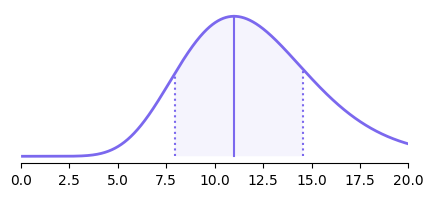

In [15]:
added_together = N_3_pdf + N_7_pdf
added_together.plot()
plt.xlim([0, 20])

We can also multiply and divide two RandomVariable objects.

(0.0, 10.0)

<Figure size 640x480 with 0 Axes>

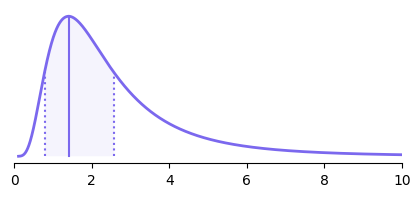

In [16]:
divided = N_7_pdf / N_3_pdf
divided.plot()
plt.xlim([0, 10])

We can also do addition and subtraction of random variables that are scaled into log space.  This is NOT the same as multiplication and division, but it is very common in crater counting applications.  For instance, when a random variable is plotted on a log-log plot, it is scaled into log space, and a log function is not applied to it per se.  When we add random variables in, say, cumulative plot space, that is addition in log space.  It is not multiplication because the random variables do not have the log applied.  They are merely scaled into log space.  To scale any random variable into log space, we can use the .log() method of the RandomVariable object, combined with the functionality that allows RandomVariables to be used as exponents.  (We can also raise a RandomVariable to an exponent, although that is not needed here.)  Here, we divide the N=7 PDF by the N=3 PDF using subtraction in log space.  Then, we convert back to linear space.

In [17]:
subtracted_in_log_space = 10**(N_7_pdf.log() - N_3_pdf.log())

If we plot this, we will see that the plot has developed a very long tail with close to zero probability.  Addition or subtraction of random variables generates very long tails covering very low probability regions of the PDF.

<Figure size 640x480 with 0 Axes>

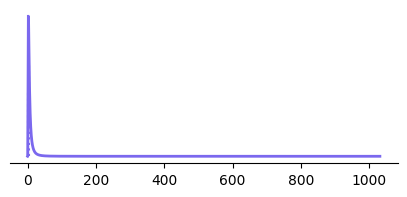

In [18]:
subtracted_in_log_space.plot()

We can shrink the long tail a bit with the .trim() method, which trims the right-hand side to the 99.99% percentile.

<Figure size 640x480 with 0 Axes>

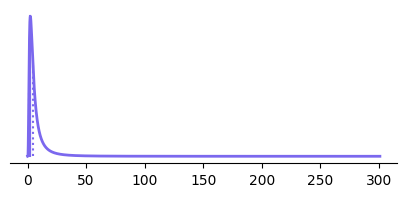

In [19]:
subtracted_in_log_space.trim().plot()

We can trim it by more if we set the precision lower.  Here, we set it to the 99.5% percentile.

<Figure size 640x480 with 0 Axes>

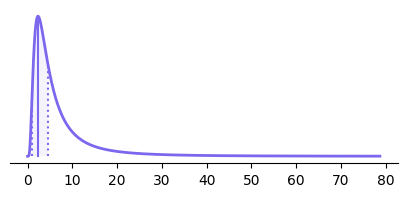

In [20]:
subtracted_in_log_space.trim(precision=0.995).plot()

Or we can use numpy-style slicing to trim it down to everything below 50.

<Figure size 640x480 with 0 Axes>

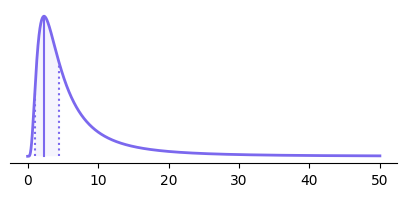

In [21]:
subtracted_in_log_space[subtracted_in_log_space.X < 50].plot()

Or we can just limit the plotting display range using standard Matplotlib commands.

(0.0, 20.0)

<Figure size 640x480 with 0 Axes>

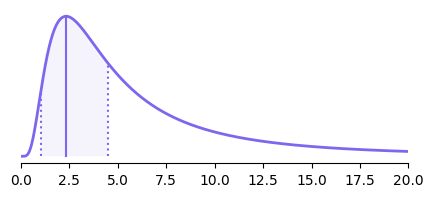

In [22]:
subtracted_in_log_space.plot()
plt.xlim([0, 20])

Or we can pass the limits to the xlim keyword argument of the RandomVariable.plot() method.

<Figure size 640x480 with 0 Axes>

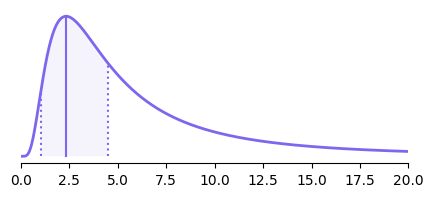

In [23]:
subtracted_in_log_space.plot(xlim=[0, 20])

With Bayesian PDFs, we also often want to combine PDFs by updating a prior with a likelihood distribution or by combining likelihood distributions using the same updating process.  To do this, let us take the N=3 PDF (in blue) as the prior and update it with the N=7 (in orange) PDF as the likelihood, producing a posterior PDF (in red).  Mathematically, this is an element by element mulitiplication, where the probabilities at each value along the X-axis are mulitplied together.  We will use the .update() method of the RandomVariable object.

(0.0, 20.0)

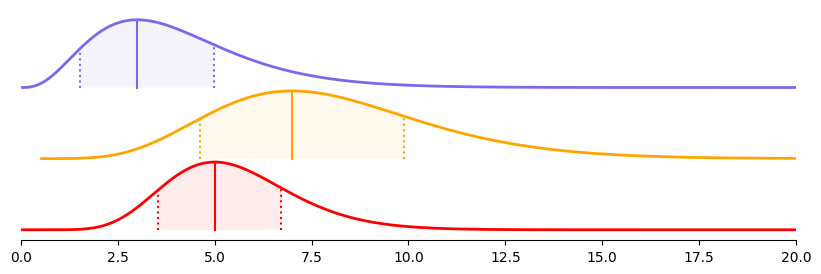

In [24]:
updated = N_3_pdf.update(N_7_pdf)

fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
erase_box(ax)
N_3_pdf.plot(upshift=2.1)
N_7_pdf.plot(upshift=1.05, color = 'orange')
updated.plot(color = 'red')
plt.xlim([0, 20])

What if you want to apply an exotic function to a RandomVariable object?  If it is actually just scaling the RandomVariable object by the function (equivalent to just applying it to the .X array and constructing a new RandomVariable object), you use the .scale() method.  Here's an example with an arctangent.

<Figure size 640x480 with 0 Axes>

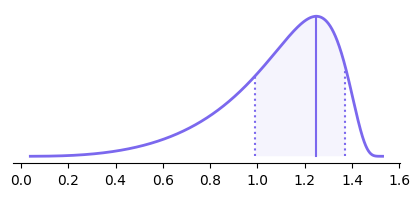

In [27]:
N_3_pdf.scale(np.arctan).plot()

What if you want to apply an exotic function to a RandomVariable object?  If you are actually applying the function to the RandomVariable, if its derivative is never negative, you can use the .apply() method.  This is equivalent to a numerical approach where you sample it using the sample method, apply the function to the samples, then reconstitute the RandomVariable object with the make_pdf_from_samples function.  Here's an example with an arctangent.

<Figure size 640x480 with 0 Axes>

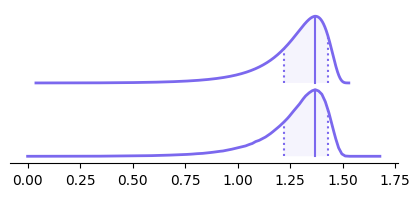

In [28]:
N_3_pdf.apply(np.arctan).plot()
make_pdf_from_samples(
    np.arctan(N_3_pdf.sample(10000000))
).as_kind('log').plot(upshift = -1.1)